In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
from datetime import datetime
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(65)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 1 | gweru
Processing Record 3 of Set 1 | micheweni
Processing Record 4 of Set 1 | kahului
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | narodychi
Processing Record 7 of Set 1 | xuddur
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | baykit
Processing Record 10 of Set 1 | manicore
Processing Record 11 of Set 1 | asau
Processing Record 12 of Set 1 | hervey bay
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | port hedland
Processing Record 17 of Set 1 | sokoni
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | turukhansk
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | grootfontein
Processing Record 22 

Processing Record 37 of Set 4 | zhigansk
Processing Record 38 of Set 4 | cayenne
Processing Record 39 of Set 4 | dhrangadhra
Processing Record 40 of Set 4 | marawi
Processing Record 41 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 42 of Set 4 | shenjiamen
Processing Record 43 of Set 4 | tidore
City not found. Skipping...
Processing Record 44 of Set 4 | obo
Processing Record 45 of Set 4 | sabha
Processing Record 46 of Set 4 | villamontes
Processing Record 47 of Set 4 | murgab
Processing Record 48 of Set 4 | bukoba
Processing Record 49 of Set 4 | kamenka
Processing Record 50 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 1 of Set 5 | korla
Processing Record 2 of Set 5 | baykalsk
Processing Record 3 of Set 5 | kokopo
Processing Record 4 of Set 5 | lazaro cardenas
Processing Record 5 of Set 5 | morondava
Processing Record 6 of Set 5 | the valley
Processing Record 7 of Set 5 | tucuman
Processing Record 8 of Set 5 | sennoy
Processing Record 9 of Set

Processing Record 25 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 26 of Set 8 | zhezkazgan
Processing Record 27 of Set 8 | maltahohe
Processing Record 28 of Set 8 | whitehorse
Processing Record 29 of Set 8 | tazovskiy
Processing Record 30 of Set 8 | saint-joseph
Processing Record 31 of Set 8 | prado
Processing Record 32 of Set 8 | chagda
City not found. Skipping...
Processing Record 33 of Set 8 | kutum
Processing Record 34 of Set 8 | muros
Processing Record 35 of Set 8 | vestmannaeyjar
Processing Record 36 of Set 8 | benton harbor
Processing Record 37 of Set 8 | oparino
Processing Record 38 of Set 8 | troitskoye
Processing Record 39 of Set 8 | balkhash
Processing Record 40 of Set 8 | hihifo
City not found. Skipping...
Processing Record 41 of Set 8 | macamic
Processing Record 42 of Set 8 | haverfordwest
Processing Record 43 of Set 8 | lasa
Processing Record 44 of Set 8 | libourne
Processing Record 45 of Set 8 | reconquista
Processing Record 46 of Set 8

Processing Record 13 of Set 12 | north marysville
City not found. Skipping...
Processing Record 14 of Set 12 | maningrida
Processing Record 15 of Set 12 | berbera
Processing Record 16 of Set 12 | gat
Processing Record 17 of Set 12 | buinsk
Processing Record 18 of Set 12 | sumter
Processing Record 19 of Set 12 | karaul
City not found. Skipping...
Processing Record 20 of Set 12 | haines junction
Processing Record 21 of Set 12 | russell
Processing Record 22 of Set 12 | davila
Processing Record 23 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 24 of Set 12 | ixtapa
Processing Record 25 of Set 12 | baruun-urt
Processing Record 26 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 27 of Set 12 | ahipara
Processing Record 28 of Set 12 | ust-kuyga
Processing Record 29 of Set 12 | nelson bay
Processing Record 30 of Set 12 | north platte
Processing Record 31 of Set 12 | cabrera
Processing Record 32 of Set 12 | tarakan
Processing Record 33 of Set 12 | manokwari
P

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gweru,-19.45,29.82,66.72,45,0,11.63,ZW,2020-10-16 19:38:40
1,Micheweni,-4.97,39.83,77.92,81,30,11.54,TZ,2020-10-16 19:38:40
2,Kahului,20.89,-156.47,84.20,58,20,5.82,US,2020-10-16 19:36:04
3,Rikitea,-23.12,-134.97,73.74,81,100,21.81,PF,2020-10-16 19:35:07
4,Narodychi,51.20,29.08,49.89,78,99,4.34,UA,2020-10-16 19:38:40
5,Xuddur,4.12,43.89,74.52,79,12,18.70,SO,2020-10-16 19:38:40
6,Baykit,61.67,96.37,27.41,94,100,6.40,RU,2020-10-16 19:38:41
7,Manicore,-5.81,-61.30,92.79,42,67,1.74,BR,2020-10-16 19:38:41
8,Asau,46.43,26.40,54.00,98,100,1.99,RO,2020-10-16 19:38:41
9,Hervey Bay,-25.30,152.85,61.00,93,66,8.05,AU,2020-10-16 19:34:05


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

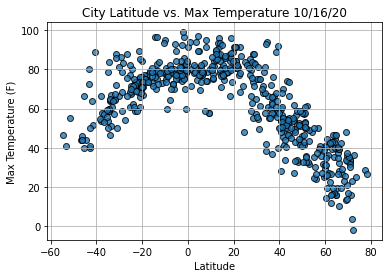

In [10]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

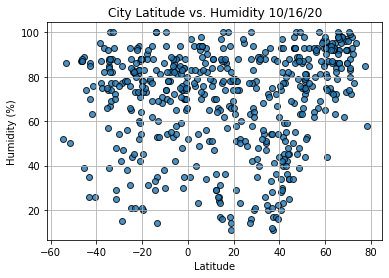

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

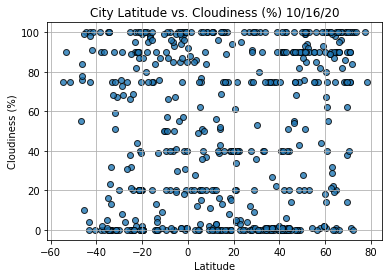

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

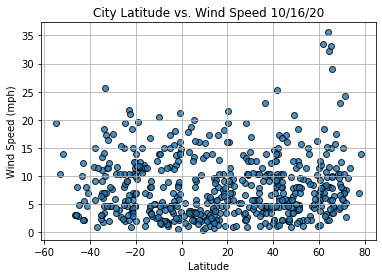

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                 Port Hedland
Lat                        -20.32
Lng                        118.57
Max Temp                     69.8
Humidity                       64
Cloudiness                      0
Wind Speed                  10.29
Country                        AU
Date          2020-10-16 19:38:42
Name: 13, dtype: object

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Kahului,20.89,-156.47,84.20,58,20,5.82,US,2020-10-16 19:36:04
4,Narodychi,51.20,29.08,49.89,78,99,4.34,UA,2020-10-16 19:38:40
5,Xuddur,4.12,43.89,74.52,79,12,18.70,SO,2020-10-16 19:38:40
6,Baykit,61.67,96.37,27.41,94,100,6.40,RU,2020-10-16 19:38:41
8,Asau,46.43,26.40,54.00,98,100,1.99,RO,2020-10-16 19:38:41
...,...,...,...,...,...,...,...,...,...
535,Kota Bahru,6.13,102.24,78.80,94,20,3.36,MY,2020-10-16 19:51:58
537,Araouane,18.90,-3.53,95.88,11,0,7.81,ML,2020-10-16 19:51:58
539,Plouzane,48.38,-4.62,51.80,87,43,5.82,FR,2020-10-16 19:51:58
540,San Quintin,30.48,-115.95,81.00,48,0,12.75,MX,2020-10-16 19:51:58


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

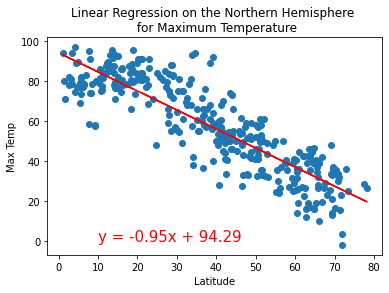

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,0))


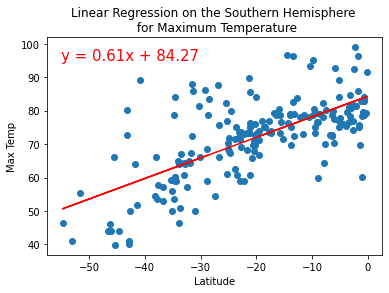

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,95))

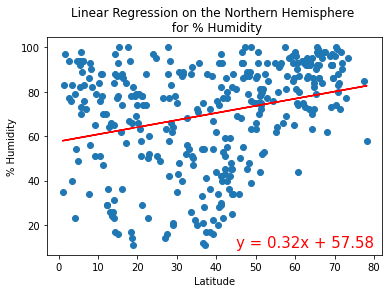

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))

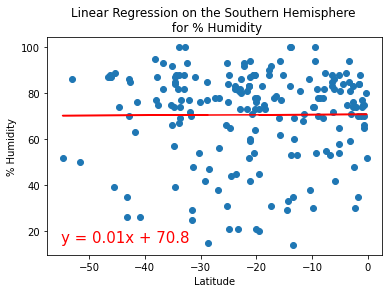

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,15))

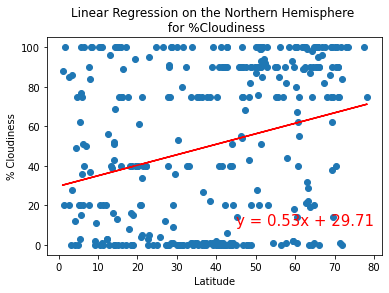

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for %Cloudiness', '% Cloudiness',(45,10))

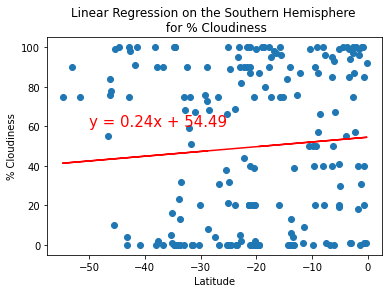

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


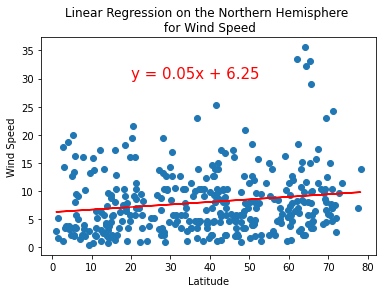

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,30))

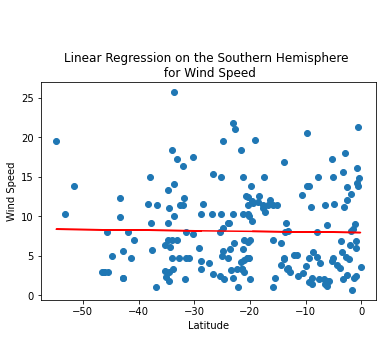

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))